In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/tattebakery_instagram_data.csv')

In [2]:
df.head(10)

,date,caption,likes,comments_count,hashtags,location,is_sidecar,sidecar_media_count,profile_url
0,2024-11-17 14:12:24,Thanksgiving is almost here! 🍂🍁🥧 \nOur amazing...,1311,6,"['applepie', 'pumpkinpie', 'baking', 'holidayb...",NaN,True,6,https://www.instagram.com/p/DCebM-wu9BC/
1,2024-11-16 13:26:50,The tiny but mighty Tatte Beacon Hill and the ...,1542,8,"['goodmorning', 'bakeryteam', 'cafeteam', 'tha...",NaN,False,0,https://www.instagram.com/p/DCbxMYouXxU/
2,2024-11-13 14:01:12,Cinnamon rolls w/buttermilk vanilla frosting f...,1493,9,"['cinnamoroll', 'thanksgiving', 'buttermilkfro...",NaN,True,4,https://www.instagram.com/p/DCUGvdguUOM/
3,2024-11-09 12:55:56,"Pastries, Coffee and Brunch all day, it’s the ...",3454,22,"['sunisout', 'weekend', 'pastry', 'brunch', 'c...",NaN,False,0,https://www.instagram.com/p/DCJsF4ZOTTw/
4,2024-11-07 16:18:30,Tatte Annapolis and Tatte Westbard here we go ...,1279,21,"['newopening', 'tatteannapolis', 'tattebethsda...",NaN,False,0,https://www.instagram.com/p/DCE5r1mOxg1/
5,2024-11-01 13:14:18,It’s pie season at Tatte! 🥧🥧🥧\nFor your Thanks...,736,8,"['pieseason', 'pie', 'applepie', 'pumpkinpie',...",NaN,True,3,https://www.instagram.com/p/DB1H1eruzzK/
6,2024-10-29 13:51:27,New Krembo! 🍋‍🟩🍋‍🟩🍋‍🟩\nVanilla lime krembo wit...,839,8,"['krembo', 'meringue', 'dessert', 'pastry', 'g...",NaN,True,2,https://www.instagram.com/p/DBtds92uuED/
7,2024-10-26 12:36:49,A cozy Fall weekend and Brunch all day☕️🥐🍳🥞🍁🍂 ...,2197,8,"['weekend', 'brunch', 'fall', 'fallmenu', 'pas...",NaN,False,0,https://www.instagram.com/p/DBlmxqIOc2A/
8,2024-10-23 12:54:00,"Exciting news! 🎄🎁💫🔥\nWherever you are, you can...",1240,19,"['itstheholidays', 'giftgiving', 'holiday', 't...",NaN,True,7,https://www.instagram.com/p/DBd6W5QO25o/
9,2024-10-19 13:54:20,Morning decisions 🥐🥐🥐\nJoin us for brunch all ...,1862,12,"['goodmorning', 'pastry', 'coffee', 'brunch', ...",NaN,False,0,https://www.instagram.com/p/DBTuFQ6OpsH/


Data Processing

In [3]:
df.isnull().sum()

,0
date,0
caption,1
likes,0
comments_count,0
hashtags,0
location,1000
is_sidecar,0
sidecar_media_count,0
profile_url,0


In [4]:
df = df.drop(columns=['location'])

In [5]:
df.columns

Index(['date', 'caption', 'likes', 'comments_count', 'hashtags', 'is_sidecar',
       'sidecar_media_count', 'profile_url'],
      dtype='object')

In [6]:
import ast

df['hashtags'] = df['hashtags'].apply(ast.literal_eval)


In [7]:
# Replace NaN or invalid entries in hashtags with empty lists
df['hashtags'] = df['hashtags'].apply(lambda x: x if isinstance(x, list) else [])

In [8]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extracting the hour component and creating a new 'hour' column
df['hour'] = df['date'].dt.hour


In [9]:
df['day_of_week'] = df['date'].dt.day_name()

In [10]:
df

,date,caption,likes,comments_count,hashtags,is_sidecar,sidecar_media_count,profile_url,hour,day_of_week
0,2024-11-17 14:12:24,Thanksgiving is almost here! 🍂🍁🥧 \nOur amazing...,1311,6,"[applepie, pumpkinpie, baking, holidaybaking, ...",True,6,https://www.instagram.com/p/DCebM-wu9BC/,14,Sunday
1,2024-11-16 13:26:50,The tiny but mighty Tatte Beacon Hill and the ...,1542,8,"[goodmorning, bakeryteam, cafeteam, thankyou, ...",False,0,https://www.instagram.com/p/DCbxMYouXxU/,13,Saturday
2,2024-11-13 14:01:12,Cinnamon rolls w/buttermilk vanilla frosting f...,1493,9,"[cinnamoroll, thanksgiving, buttermilkfrosting...",True,4,https://www.instagram.com/p/DCUGvdguUOM/,14,Wednesday
3,2024-11-09 12:55:56,"Pastries, Coffee and Brunch all day, it’s the ...",3454,22,"[sunisout, weekend, pastry, brunch, coffee, co...",False,0,https://www.instagram.com/p/DCJsF4ZOTTw/,12,Saturday
4,2024-11-07 16:18:30,Tatte Annapolis and Tatte Westbard here we go ...,1279,21,"[newopening, tatteannapolis, tattebethsda, tea...",False,0,https://www.instagram.com/p/DCE5r1mOxg1/,16,Thursday
...,...,...,...,...,...,...,...,...,...,...
995,2018-06-29 12:13:57,Our famously delicious cheesecake is all dress...,1448,17,"[happyfourth, 4thofjuly, weekend, happyweekend...",False,0,https://www.instagram.com/p/Bkm7F_XhHBq/,12,Friday
996,2018-06-27 22:37:27,Let the fruit shine. Make it nice. #tattebaker...,1661,32,"[tattebakery, becreative, keepitfresh, myfavor...",False,0,https://www.instagram.com/p/Bki428TBDbw/,22,Wednesday
997,2018-06-26 12:01:58,I love this outtake from my interview with @th...,1366,58,"[jointhejourney, jointheride, fantasticrollerc...",False,0,https://www.instagram.com/p/BkfLVrShvfi/,12,Tuesday
998,2018-06-24 15:09:07,Summer baking for summer gatherings. 🍅🌿🌱☀️💛 #s...,1337,23,"[summer, gathering, baking, heirloom, tomatoes...",False,0,https://www.instagram.com/p/BkaXKnthY-w/,15,Sunday


In [11]:
print(df.dtypes)

date                   datetime64[ns]
caption                        object
likes                           int64
comments_count                  int64
hashtags                       object
is_sidecar                       bool
sidecar_media_count             int64
profile_url                    object
hour                            int32
day_of_week                    object
dtype: object


In [12]:
df.describe()

,date,likes,comments_count,sidecar_media_count,hour
count,1000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2021-07-20 21:09:44.611000064,1804.750000,24.645000,0.840000,14.383000
min,2018-06-23 17:34:11,196.000000,0.000000,0.000000,0.000000
25%,2020-01-09 07:01:20.249999872,1139.250000,10.000000,0.000000,13.000000
50%,2021-07-05 17:45:22,1552.500000,17.000000,0.000000,14.000000
75%,2022-12-21 11:35:29.750000128,2185.500000,28.000000,0.000000,15.000000
max,2024-11-17 14:12:24,24335.000000,649.000000,15.000000,23.000000
std,NaN,1194.147492,34.894249,2.128128,3.009546


In [13]:
df['engagement'] = df['likes'] + df['comments_count']
top_posts = df.sort_values(by='engagement', ascending=False).head(10)
top_posts[['date', 'caption', 'engagement']]


,date,caption,engagement
51,2024-06-14 23:29:15,Pure joy ❤️❤️❤️\n\nThe sweetest capture by @ph...,24453
371,2022-03-21 21:36:05,When Spider-Man and MJ came for brunch!!!!! 🤩👀...,12119
113,2024-01-06 14:12:01,Morning decisions 🥐🥐🥐\n\nBrave the (first) sno...,7922
246,2022-12-29 15:09:34,A new year a new Tatte calendar a gift for you...,7207
608,2020-12-30 14:55:15,A gift for you! our incredible guests 👀💛🎁. \n\...,5905
670,2020-08-25 14:25:34,DC! We had an incredible soft opening and are ...,5811
228,2023-02-22 13:03:30,Happy birthday Tatte!!! 15 years and forever m...,5686
358,2022-04-10 12:48:29,Our individual Lemon mint tarts in the making!...,5378
479,2021-08-15 12:28:39,Good morning Sunshine 🥐☕️☀️💛✨\nExciting day fo...,5260
426,2021-11-30 16:33:44,A gift for you! our incredible guests 🎁🙏🏻❤️. \...,5227


In [14]:
# Extract top hashtag if available
df['top_hashtag'] = df['hashtags'].apply(lambda x: x[0] if len(x) > 0 else None)

print(df[['hashtags', 'top_hashtag']].head())

                                            hashtags  top_hashtag
0  [applepie, pumpkinpie, baking, holidaybaking, ...     applepie
1  [goodmorning, bakeryteam, cafeteam, thankyou, ...  goodmorning
2  [cinnamoroll, thanksgiving, buttermilkfrosting...  cinnamoroll
3  [sunisout, weekend, pastry, brunch, coffee, co...     sunisout
4  [newopening, tatteannapolis, tattebethsda, tea...   newopening


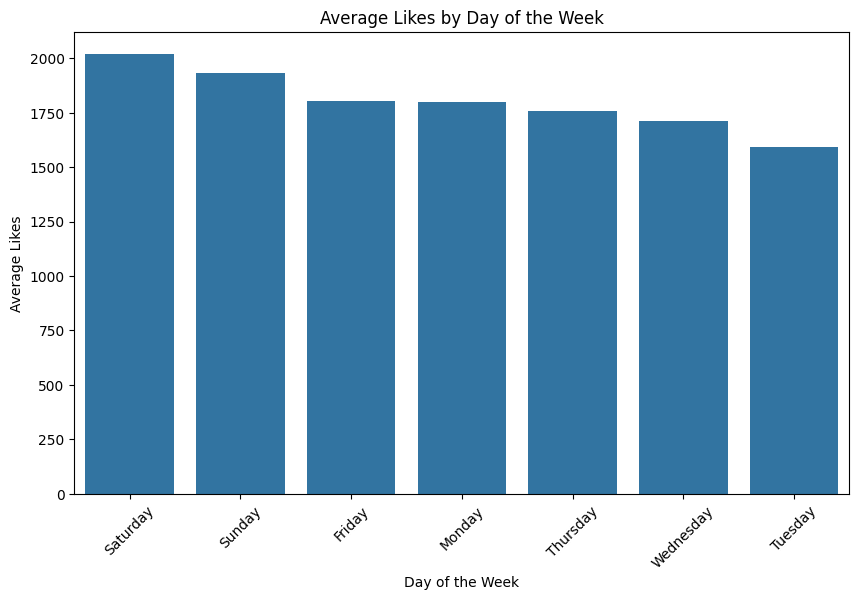

In [15]:
# Calculate average likes and comments by day of the week
engagement_by_day = df.groupby('day_of_week')[['likes', 'comments_count']].mean().sort_values(by='likes', ascending=False)

# Plot the engagement by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=engagement_by_day.index, y=engagement_by_day['likes'])
plt.title('Average Likes by Day of the Week')
plt.ylabel('Average Likes')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()


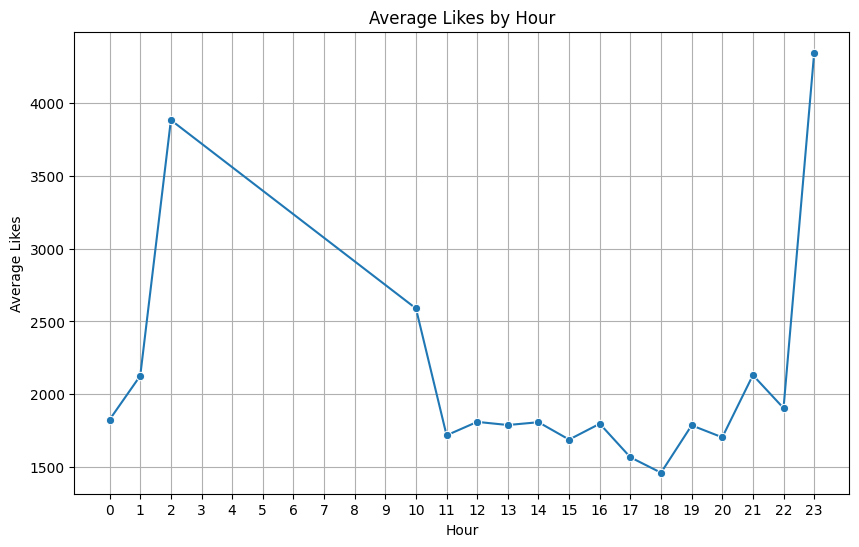

In [16]:
# Calculate average likes and comments by hour
engagement_by_hour = df.groupby('hour')[['likes', 'comments_count']].mean().sort_values(by='likes', ascending=False)

# Plot engagement by hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=engagement_by_hour, x=engagement_by_hour.index, y='likes', marker='o')
plt.title('Average Likes by Hour')
plt.ylabel('Average Likes')
plt.xlabel('Hour')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

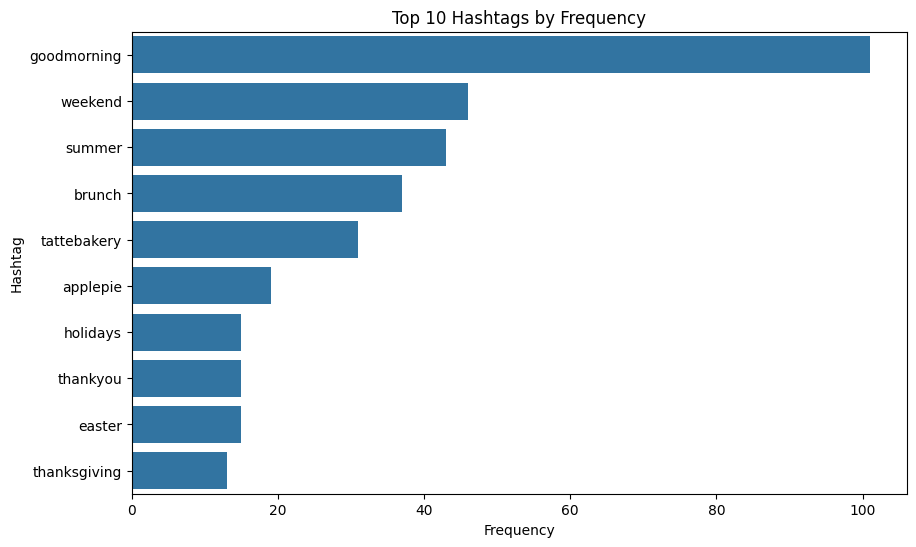

In [17]:
# Analyze top-performing hashtags
top_hashtags = df['top_hashtag'].value_counts().head(10)

# Plot top hashtags
plt.figure(figsize=(10, 6))
sns.barplot(x=top_hashtags.values, y=top_hashtags.index)
plt.title('Top 10 Hashtags by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.show()

In [18]:
media_engagement = df.groupby('is_sidecar')[['likes', 'comments_count']].mean()
print(media_engagement)


                  likes  comments_count
is_sidecar                             
False       1770.882064       24.098280
True        1952.967742       27.037634


In [19]:
!pip install vaderSentiment

import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment of text with emojis
def vader_sentiment_analysis(caption):
    if isinstance(caption, str):  # Check if the caption is a string
        return analyzer.polarity_scores(caption)['compound']
    return 0  # Return 0 for non-string values

# Apply the sentiment analysis to the 'caption' column
df['vader_sentiment'] = df['caption'].apply(vader_sentiment_analysis)

# Check the result
print(df[['caption', 'vader_sentiment']].head())


                                             caption  vader_sentiment
0  Thanksgiving is almost here! 🍂🍁🥧 \nOur amazing...           0.9343
1  The tiny but mighty Tatte Beacon Hill and the ...           0.9838
2  Cinnamon rolls w/buttermilk vanilla frosting f...           0.9719
3  Pastries, Coffee and Brunch all day, it’s the ...           0.0000
4  Tatte Annapolis and Tatte Westbard here we go ...           0.9737


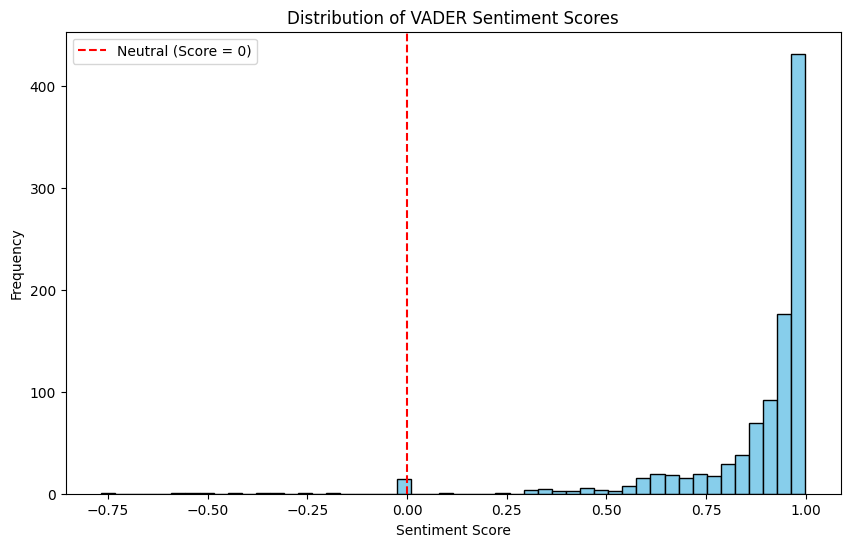

In [20]:
# Plot the VADER sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(df['vader_sentiment'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of VADER Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Neutral (Score = 0)')
plt.legend()
plt.show()

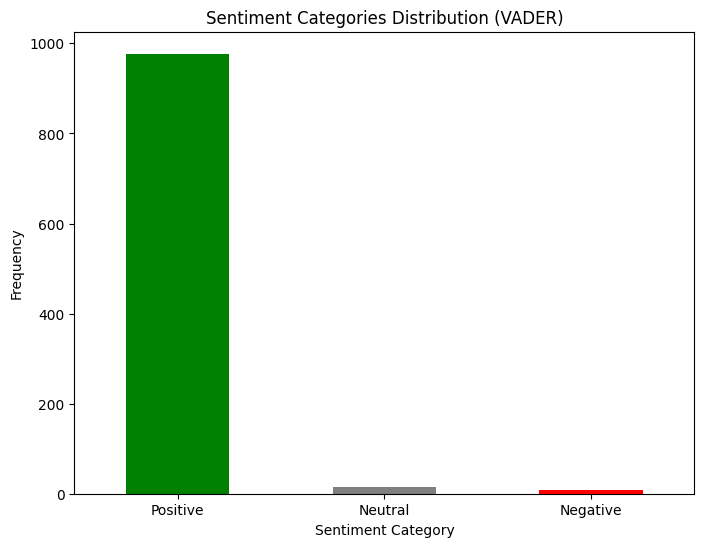

In [21]:
# Classify sentiments into categories based on the compound score
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['vader_sentiment_category'] = df['vader_sentiment'].apply(classify_sentiment)

# Plot the sentiment categories
sentiment_counts = df['vader_sentiment_category'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Categories Distribution (VADER)')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [22]:
# Check the distribution of sentiment categories
print(df['vader_sentiment_category'].value_counts())

# Calculate the average engagement (likes + comments_count) for each sentiment category
df['engagement'] = df['likes'] + df['comments_count']  # Assuming engagement is sum of likes and comments

# Group by sentiment category and calculate the average engagement
engagement_by_sentiment = df.groupby('vader_sentiment_category')[['engagement']].mean()

# Check the average engagement for each sentiment category
print(engagement_by_sentiment)



vader_sentiment_category
Positive    977
Neutral      14
Negative      9
Name: count, dtype: int64
                           engagement
vader_sentiment_category             
Negative                  1783.888889
Neutral                   1383.714286
Positive                  1836.200614


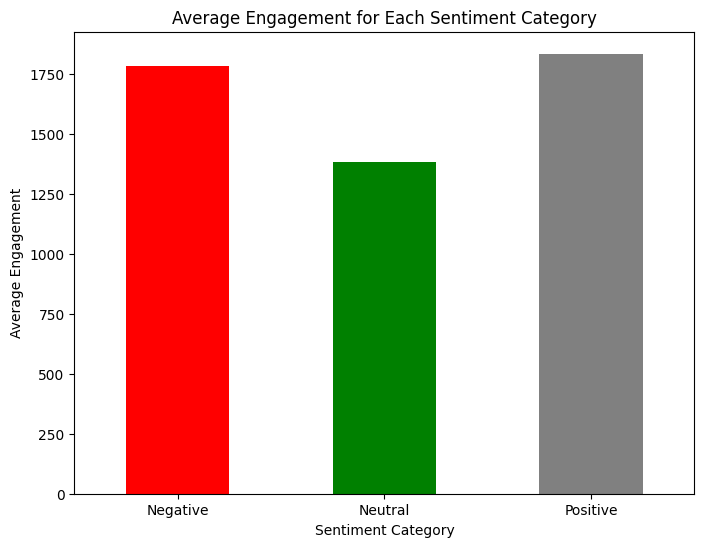

In [23]:

# Plot all sentiments to see the comparison
plt.figure(figsize=(8, 6))
df.groupby('vader_sentiment_category')['engagement'].mean().plot(kind='bar', color=['red', 'green', 'gray'])
plt.title('Average Engagement for Each Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Engagement')
plt.xticks(rotation=0)
plt.show()



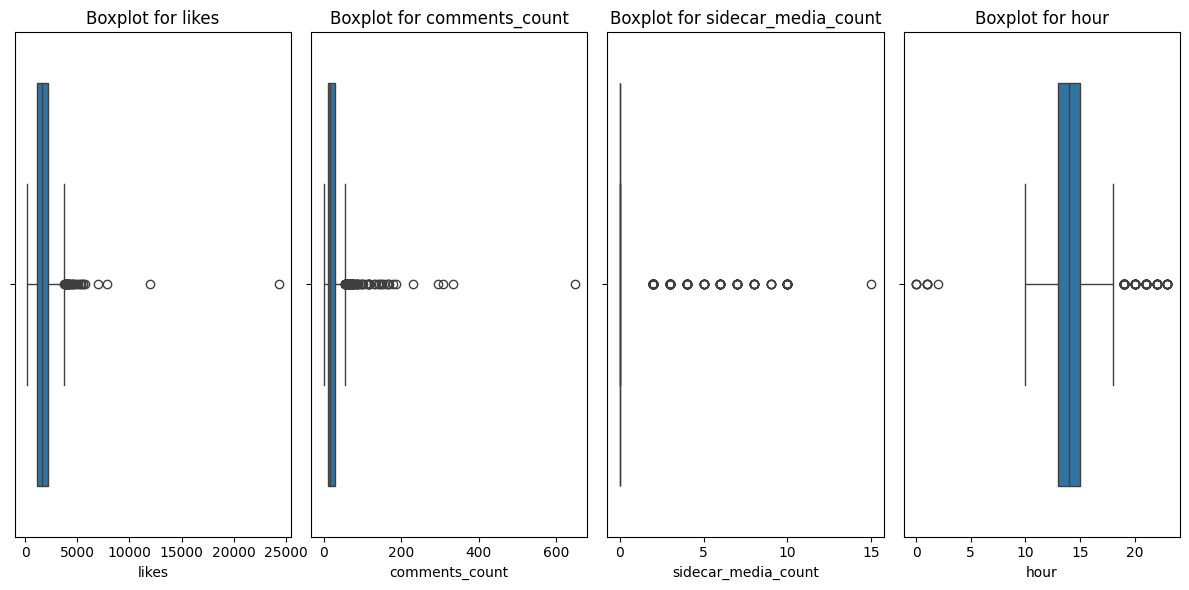

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features to visualize outliers
numerical_features = ['likes', 'comments_count', 'sidecar_media_count', 'hour']

# Plot boxplots for these features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i+1)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot for {feature}')

plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import numpy as np

# Assuming df is your dataframe

# Define a function to handle outliers using IQR method
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Handle outliers for 'likes' and 'comments_count'
df = handle_outliers_iqr(df, 'likes')
df = handle_outliers_iqr(df, 'comments_count')

# For 'sidecar_media_count', let's just leave it as is for now

# For 'hour', we'll leave it unchanged since it's likely cyclical

print("Outliers handled!")


Outliers handled!


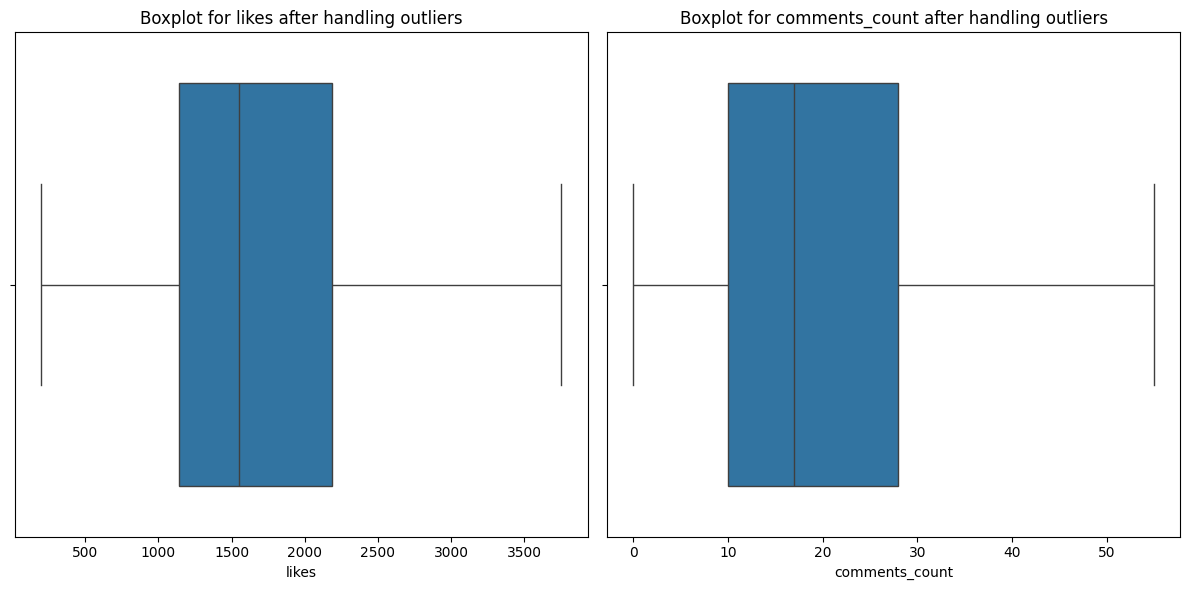

In [26]:

# Replot boxplots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, feature in enumerate(['likes', 'comments_count']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot for {feature} after handling outliers')

plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Prepare data for linear regression
X = df[['hour', 'sidecar_media_count']]
y = df['likes']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 727317.1269535839


Skewness of likes: 0.8285044091897827


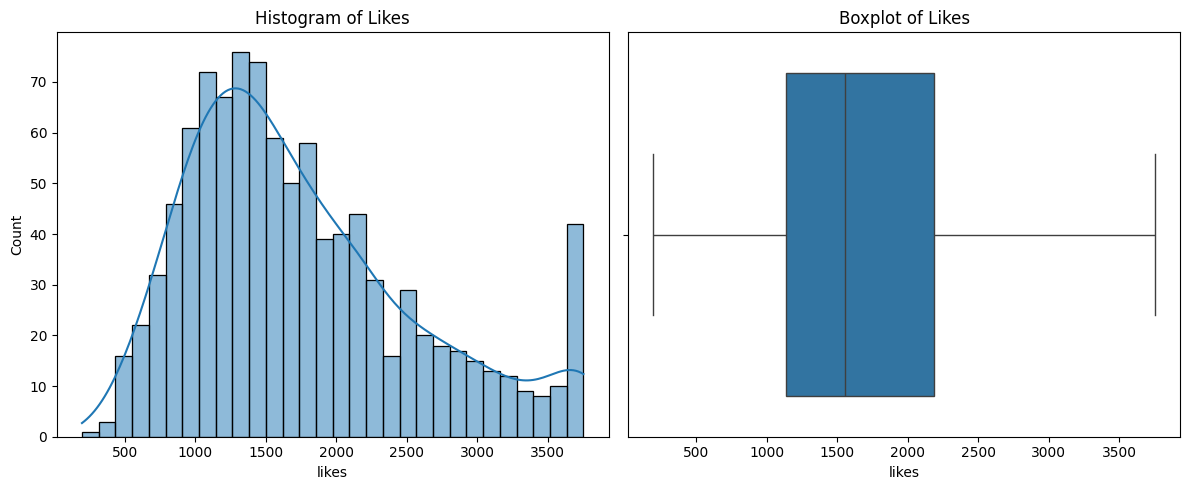

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Check skewness
likes_skewness = skew(df['likes'])
print(f"Skewness of likes: {likes_skewness}")

# Plot histogram and boxplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['likes'], bins=30, kde=True)
plt.title("Histogram of Likes")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['likes'])
plt.title("Boxplot of Likes")

plt.tight_layout()
plt.show()


In [29]:
# Apply log transformation if moderately skewed
if likes_skewness > 0.5:
    df['likes'] = np.log1p(df['likes'])
    print("Applied log transformation to likes.")


Applied log transformation to likes.


Skewness of likes: -0.20597835518100452


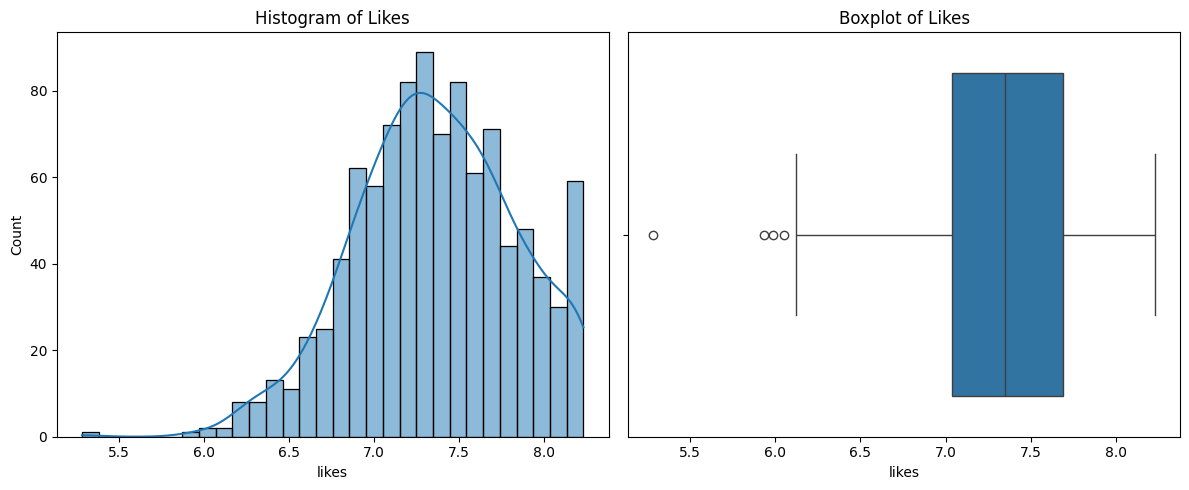

In [30]:
# Check skewness
likes_skewness = skew(df['likes'])
print(f"Skewness of likes: {likes_skewness}")

# Plot histogram and boxplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['likes'], bins=30, kde=True)
plt.title("Histogram of Likes")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['likes'])
plt.title("Boxplot of Likes")

plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Convert day_of_week to categorical dummy variables
df = pd.get_dummies(df, columns=['day_of_week'], drop_first=True)

# Prepare data for linear regression
X = df[['hour', 'sidecar_media_count'] + [col for col in df.columns if 'day_of_week' in col]]
y = df['likes']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.2498386968845812


In [33]:
predictions_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(predictions_df.head())

     Actual  Predicted
0  6.949856   7.298158
1  7.605890   7.266328
2  7.953670   7.513215
3  7.985484   7.470037
4  7.895436   7.470037


In [32]:
r2_score = model.score(X_test, y_test)
print(f"R² Score: {r2_score}")


R² Score: -0.020918457740707108
